In [12]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [13]:
# Load and visualize audio
def load_audio(file_path):
    audio_data, sr = librosa.load(file_path, sr=None, mono=True)
    return audio_data, sr

def visualize_waveform(audio_data, sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [14]:
# Audio manipulation
# Change playback speed
def change_playback_speed(audio_data, speed_factor):
    return librosa.effects.time_stretch(audio_data, rate=speed_factor)

# Add echo effect
def add_echo(audio_data, sr, delay=0.2, decay=0.5):
    delay_samples = int(sr * delay)
    echo_audio = np.pad(audio_data, (delay_samples, 0), mode='constant')
    echo_audio = audio_data + decay * echo_audio[:len(audio_data)]
    return echo_audio

In [15]:
# Spectral analysis - display spectrogram
def display_spectrogram(audio_data, sr):
    plt.figure(figsize=(14, 5))
    S = librosa.stft(audio_data)
    S_db = librosa.amplitude_to_db(np.abs(S))
    librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

Displaying waveform...


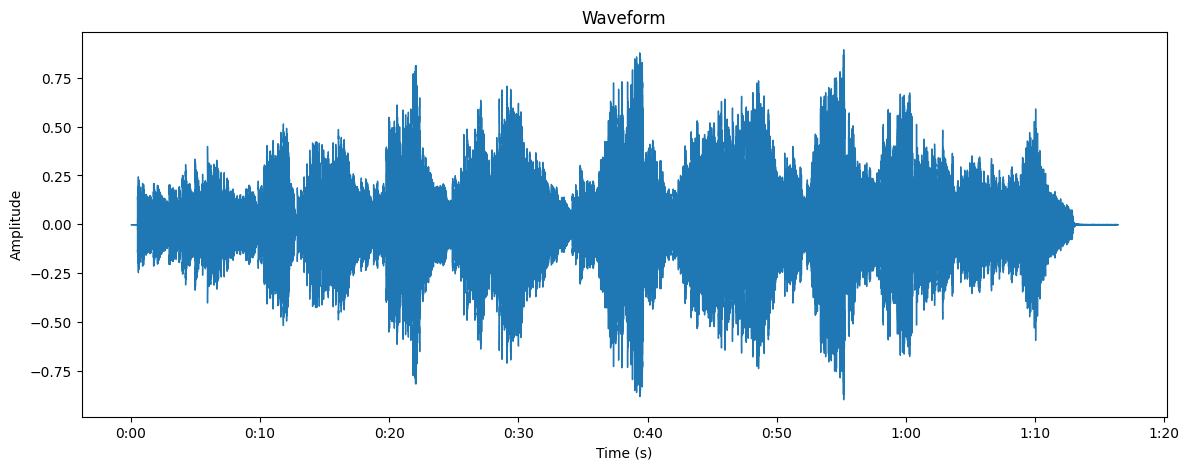

Changing playback speed by factor of 1.5...
Adding echo effect...
Displaying spectrogram...


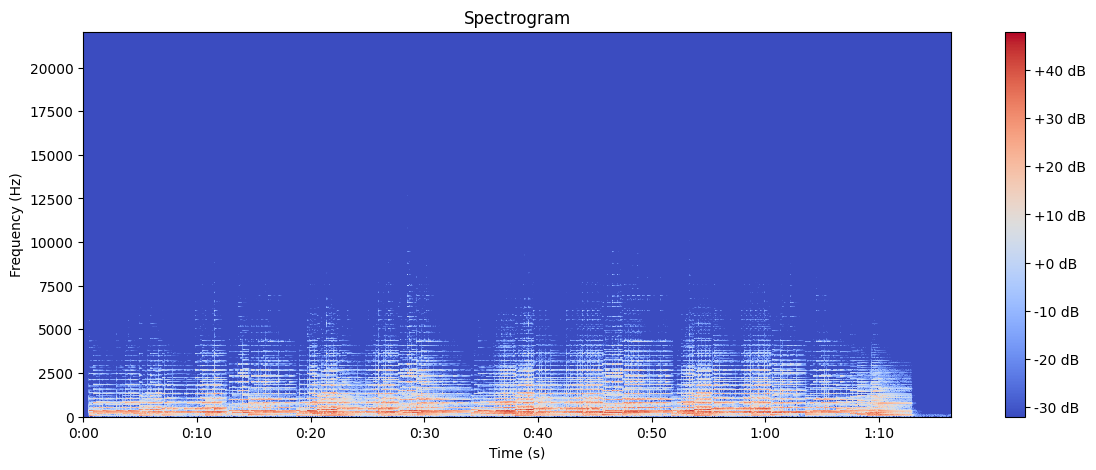

In [16]:
def main():
    file_path = "Song.wav"  
    audio_data, sr = load_audio(file_path)
    
    print("Displaying waveform...")
    visualize_waveform(audio_data, sr)

    playback_speed = 1.5
    print(f"Changing playback speed by factor of {playback_speed}...")
    audio_speed_changed = change_playback_speed(audio_data, playback_speed)
    write("audio_speed_changed.wav", sr, (audio_speed_changed * 32767).astype(np.int16))

    print("Adding echo effect...")
    audio_echoed = add_echo(audio_data, sr)
    write("audio_echoed.wav", sr, (audio_echoed * 32767).astype(np.int16))

    print("Displaying spectrogram...")
    display_spectrogram(audio_data, sr)

if __name__ == "__main__":
    main()
